In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

In [10]:
df.columns

Index(['ISO_Code', 'Country', 'Population', 'Blood_Group_O_Positive (%)',
       'Blood_Group_A_Positive(%)', 'Blood_Group_B_Positive%',
       'Blood_Group_AB_Positive (%)', 'Blood_Group_O_Negative( %)',
       'Blood_Group_A_Negative( %)', 'Blood_Group_B_Negative (%)',
       'Blood_Group_AB_Negative (%)', 'Centroid_Lat', 'Centroid_Lon',
       'Area_sq_km', 'Pop_Density (per km²)', 'GDP_per_capita (USD)',
       'Median_Age', 'Literacy_Rate (%)', 'Healthcare_Index',
       'Urbanization(%) '],
      dtype='object')

In [11]:
# Check for duplicates in ISO_Code and Country
duplicate_iso = df["ISO_Code"].duplicated().sum()
duplicate_country = df["Country"].duplicated().sum()

# Check for leading/trailing spaces or inconsistent casing
df["ISO_Code"] = df["ISO_Code"].str.strip().str.upper()
df["Country"] = df["Country"].str.strip().str.title()

# Verify uniqueness of ISO_Code
unique_iso_count = df["ISO_Code"].nunique()
total_iso_count = len(df["ISO_Code"])

# Display results
{
    "Duplicate_ISO_Codes": duplicate_iso,
    "Duplicate_Country_Names": duplicate_country,
    "Unique_ISO_Codes": unique_iso_count,
    "Total_Records": total_iso_count,
}


{'Duplicate_ISO_Codes': 0,
 'Duplicate_Country_Names': 0,
 'Unique_ISO_Codes': 126,
 'Total_Records': 126}

In [82]:
df['O_Positive_to_Negative_Ratio'] = df['Blood_Group_O_Positive (%)'] / df['Blood_Group_O_Negative( %)']
df['A_Positive_to_Negative_Ratio'] = df['Blood_Group_A_Positive(%)'] / df['Blood_Group_A_Negative( %)']
df['B_Positive_to_Negative_Ratio'] = df['Blood_Group_B_Positive%'] / df['Blood_Group_B_Negative (%)']
df['AB_Positive_to_Negative_Ratio'] = df['Blood_Group_AB_Positive (%)'] / df['Blood_Group_AB_Negative (%)']

In [84]:
df['O_Positive_PerCapita'] = df['Blood_Group_O_Positive (%)'] * df['Population'] / 100
df['A_Positive_PerCapita'] = df['Blood_Group_A_Positive(%)'] * df['Population'] / 100
df['B_Positive_PerCapita'] = df['Blood_Group_B_Positive%'] * df['Population'] / 100
df['AB_Positive_PerCapita'] = df['Blood_Group_AB_Positive (%)'] * df['Population'] / 100
df['O_Negative_PerCapita'] = df['Blood_Group_O_Negative( %)'] * df['Population'] / 100
df['A_Negative_PerCapita'] = df['Blood_Group_A_Negative( %)'] * df['Population'] / 100
df['B_Negative_PerCapita'] = df['Blood_Group_B_Negative (%)'] * df['Population'] / 100
df['AB_Negative_PerCapita'] = df['Blood_Group_AB_Negative (%)'] * df['Population'] / 100

In [86]:
df['Total_Positive_Percentage'] = df['Blood_Group_O_Positive (%)'] + df['Blood_Group_A_Positive(%)'] + df['Blood_Group_B_Positive%'] + df['Blood_Group_AB_Positive (%)']

In [88]:
df['Total_Negative_Percentage'] = df['Blood_Group_O_Negative( %)'] + df['Blood_Group_A_Negative( %)'] + df['Blood_Group_B_Negative (%)'] + df['Blood_Group_AB_Negative (%)']

In [90]:
df['O_Positive_vs_Total'] = df['Blood_Group_O_Positive (%)'] / df['Total_Positive_Percentage']
df['A_Positive_vs_Total'] = df['Blood_Group_A_Positive(%)'] / df['Total_Positive_Percentage']
df['B_Positive_vs_Total'] = df['Blood_Group_B_Positive%'] / df['Total_Positive_Percentage']
df['AB_Positive_vs_Total'] = df['Blood_Group_AB_Positive (%)'] / df['Total_Positive_Percentage']

In [92]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the numerical columns you want to standardize
cols_to_standardize = ['Population', 'Blood_Group_O_Positive (%)', 'Blood_Group_A_Positive(%)',
                       'Blood_Group_B_Positive%', 'Blood_Group_AB_Positive (%)', 'Blood_Group_O_Negative( %)', 
                       'Blood_Group_A_Negative( %)', 'Blood_Group_B_Negative (%)', 'Blood_Group_AB_Negative (%)']

# Fit and transform the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [104]:
# Check for missing values in the dataset
df.isnull().sum()

ISO_Code                              0
Country                               0
Population                            0
Blood_Group_O_Positive (%)            0
Blood_Group_A_Positive(%)             0
Blood_Group_B_Positive%               0
Blood_Group_AB_Positive (%)           1
Blood_Group_O_Negative( %)            1
Blood_Group_A_Negative( %)            1
Blood_Group_B_Negative (%)            1
Blood_Group_AB_Negative (%)           1
Centroid_Lat                          0
Centroid_Lon                          0
Area_sq_km                            0
Pop_Density (per km²)                 0
GDP_per_capita (USD)                126
Median_Age                            0
Literacy_Rate (%)                     0
Healthcare_Index                      0
Urbanization(%)                       0
O_Positive_to_O_Negative_Ratio        1
A_Positive_to_A_Negative_Ratio        1
B_Positive_to_B_Negative_Ratio        1
AB_Positive_to_AB_Negative_Ratio      2
O_Positive_Per_Capita                 0


In [106]:
# Impute missing values with the mean (for numerical columns)
df['Population'] = df['Population'].fillna(df['Population'].mean())

# Alternatively, impute with the median
df['Blood_Group_O_Positive (%)'] = df['Blood_Group_O_Positive (%)'].fillna(df['Blood_Group_O_Positive (%)'].median())


In [108]:
# Impute missing values in a categorical column with the mode
df['Blood_Group_A_Positive(%)'] = df['Blood_Group_A_Positive(%)'].fillna(df['Blood_Group_A_Positive(%)'].mode()[0])


In [116]:
# Forward fill missing values
df['Blood_Group_O_Positive (%)'] = df['Blood_Group_O_Positive (%)'].ffill()

# Backward fill missing values (if any are left after forward fill)
df['Blood_Group_O_Positive (%)'] = df['Blood_Group_O_Positive (%)'].bfill()

# Apply forward fill first, then backward fill for any remaining missing values
df['Blood_Group_O_Positive (%)'] = df['Blood_Group_O_Positive (%)'].ffill().bfill()

In [130]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate mean, median, and standard deviation for the numeric columns
mean_values = numeric_df.mean()
median_values = numeric_df.median()
std_values = numeric_df.std()

# Display the summary statistics
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

print(summary_stats)


                                          Mean        Median  \
Population                        1.689042e-01 -2.957578e-05   
Blood_Group_O_Positive (%)        1.639518e-01  0.000000e+00   
Blood_Group_A_Positive(%)        -7.855393e-02  0.000000e+00   
Blood_Group_B_Positive%           1.038217e-01  0.000000e+00   
Blood_Group_AB_Positive (%)       1.102888e-01  0.000000e+00   
Blood_Group_O_Negative( %)       -1.160000e-03  0.000000e+00   
Blood_Group_A_Negative( %)        1.203840e-01  0.000000e+00   
Blood_Group_B_Negative (%)        4.494964e-02  0.000000e+00   
Blood_Group_AB_Negative (%)       7.650000e-02  0.000000e+00   
Centroid_Lat                      2.520135e+01  2.801500e+01   
Centroid_Lon                      2.663254e+01  2.297000e+01   
Pop_Density (per km²)             4.451270e+02  9.350000e+01   
GDP_per_capita (USD)                       NaN           NaN   
Median_Age                        3.121984e+01  3.000000e+01   
Literacy_Rate (%)                 9.2198

In [132]:
# Get summary statistics for all numeric columns
numeric_summary = df.describe()

print(numeric_summary)


       Population  Blood_Group_O_Positive (%)  Blood_Group_A_Positive(%)  \
count  126.000000                  126.000000                 126.000000   
mean     0.168904                    0.163952                  -0.078554   
std      0.476420                    0.701356                   0.677138   
min     -0.460048                   -0.779037                  -1.660182   
25%     -0.208112                   -0.378541                  -0.584955   
50%     -0.000030                    0.000000                   0.000000   
75%      0.472248                    0.621459                   0.415045   
max      1.837091                    2.620397                   1.691310   

       Blood_Group_B_Positive%  Blood_Group_AB_Positive (%)  \
count               126.000000                   125.000000   
mean                  0.103822                     0.110289   
std                   0.666856                     0.606839   
min                  -0.906126                    -0.989305   


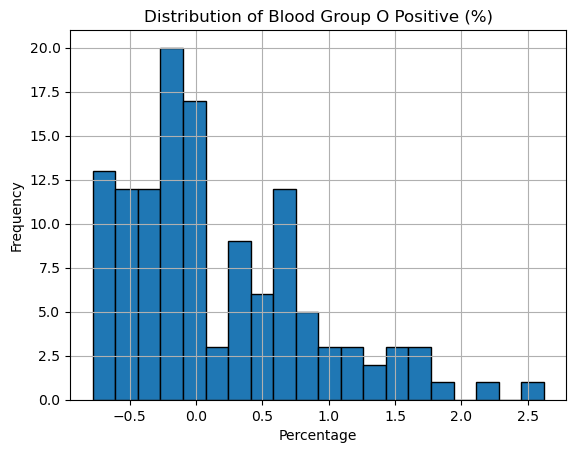

In [126]:
import matplotlib.pyplot as plt

# Plot a histogram for 'Blood_Group_O_Positive (%)'
df['Blood_Group_O_Positive (%)'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Blood Group O Positive (%)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


In [128]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate mean, median, and standard deviation for the numeric columns
mean_values = numeric_df.mean()
median_values = numeric_df.median()
std_values = numeric_df.std()

# Display the summary statistics
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

print(summary_stats)


                                          Mean        Median  \
Population                        1.689042e-01 -2.957578e-05   
Blood_Group_O_Positive (%)        1.639518e-01  0.000000e+00   
Blood_Group_A_Positive(%)        -7.855393e-02  0.000000e+00   
Blood_Group_B_Positive%           1.038217e-01  0.000000e+00   
Blood_Group_AB_Positive (%)       1.102888e-01  0.000000e+00   
Blood_Group_O_Negative( %)       -1.160000e-03  0.000000e+00   
Blood_Group_A_Negative( %)        1.203840e-01  0.000000e+00   
Blood_Group_B_Negative (%)        4.494964e-02  0.000000e+00   
Blood_Group_AB_Negative (%)       7.650000e-02  0.000000e+00   
Centroid_Lat                      2.520135e+01  2.801500e+01   
Centroid_Lon                      2.663254e+01  2.297000e+01   
Pop_Density (per km²)             4.451270e+02  9.350000e+01   
GDP_per_capita (USD)                       NaN           NaN   
Median_Age                        3.121984e+01  3.000000e+01   
Literacy_Rate (%)                 9.2198

C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


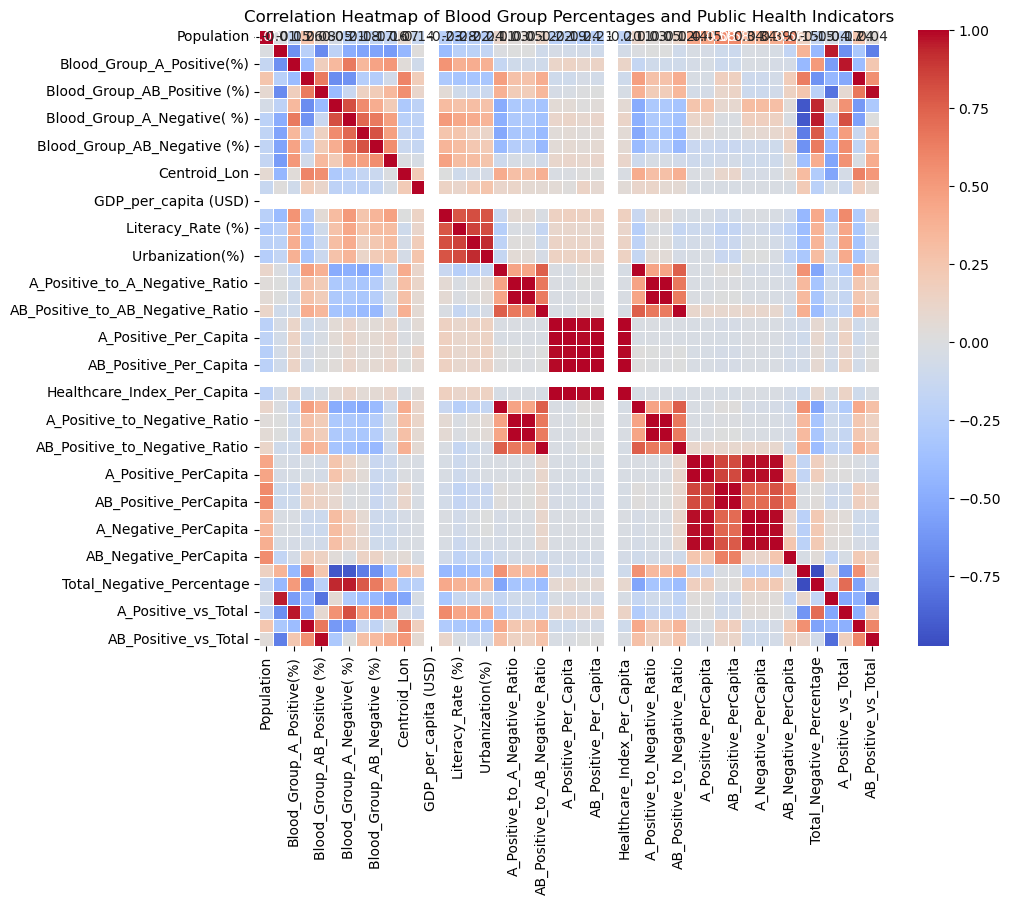

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Blood Group Percentages and Public Health Indicators')
plt.show()


C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

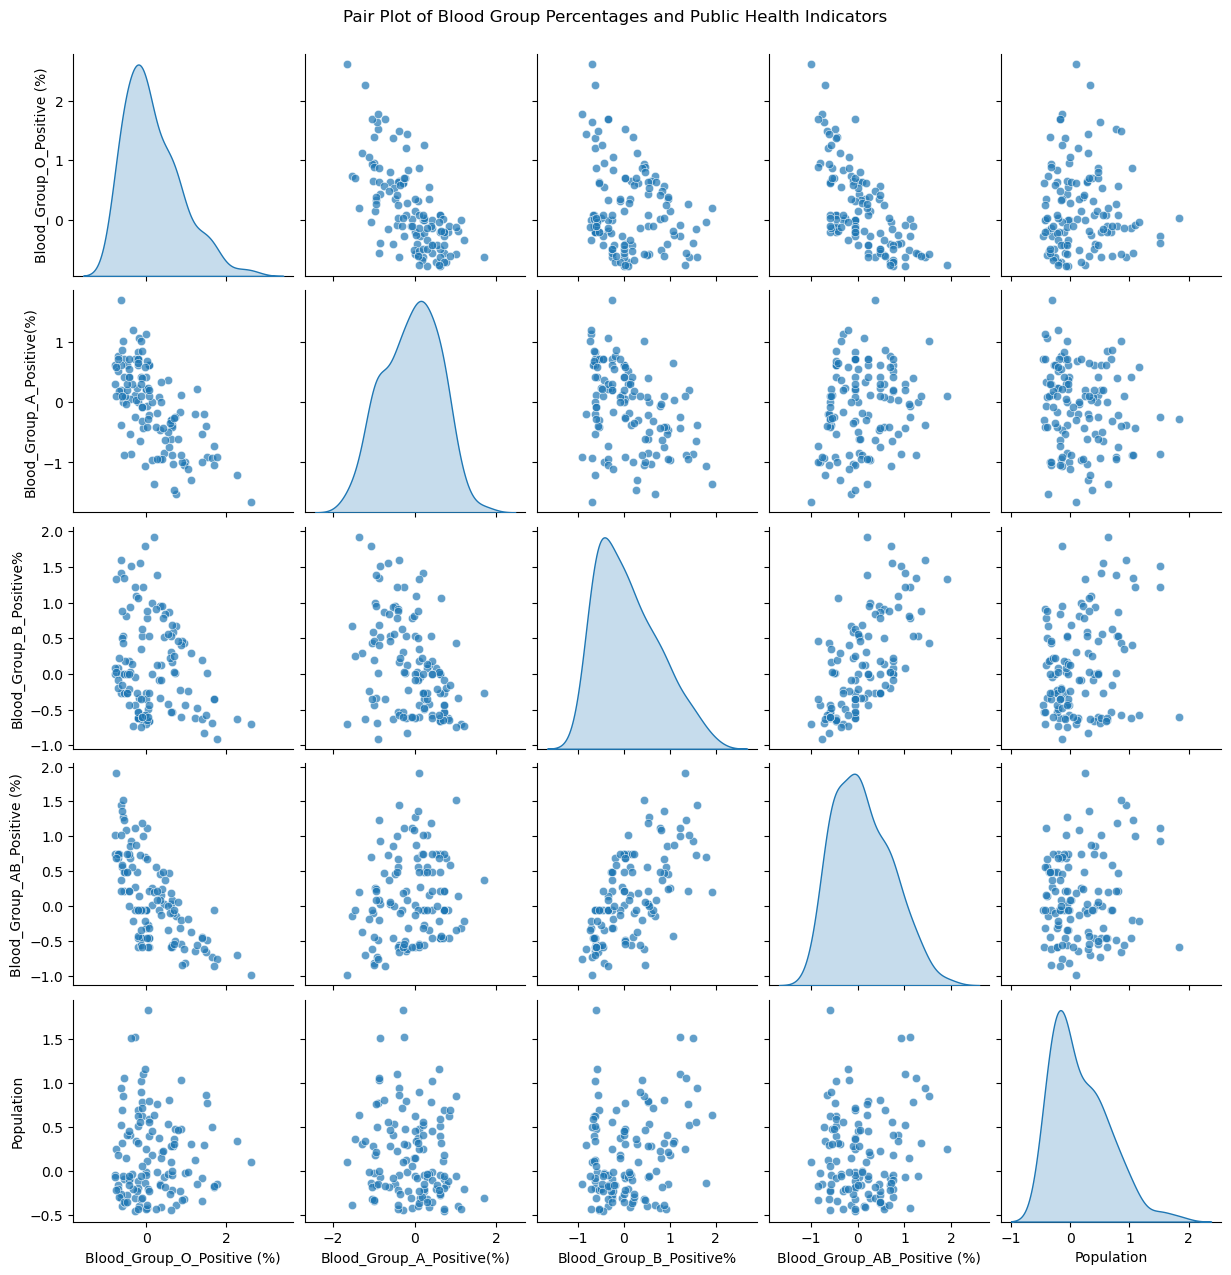

In [152]:

pair_plot_columns = ['Blood_Group_O_Positive (%)', 'Blood_Group_A_Positive(%)', 'Blood_Group_B_Positive%', 'Blood_Group_AB_Positive (%)', 'Population']  

# Plot the pair plot
sns.pairplot(df[pair_plot_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Blood Group Percentages and Public Health Indicators', y=1.02)
plt.show()


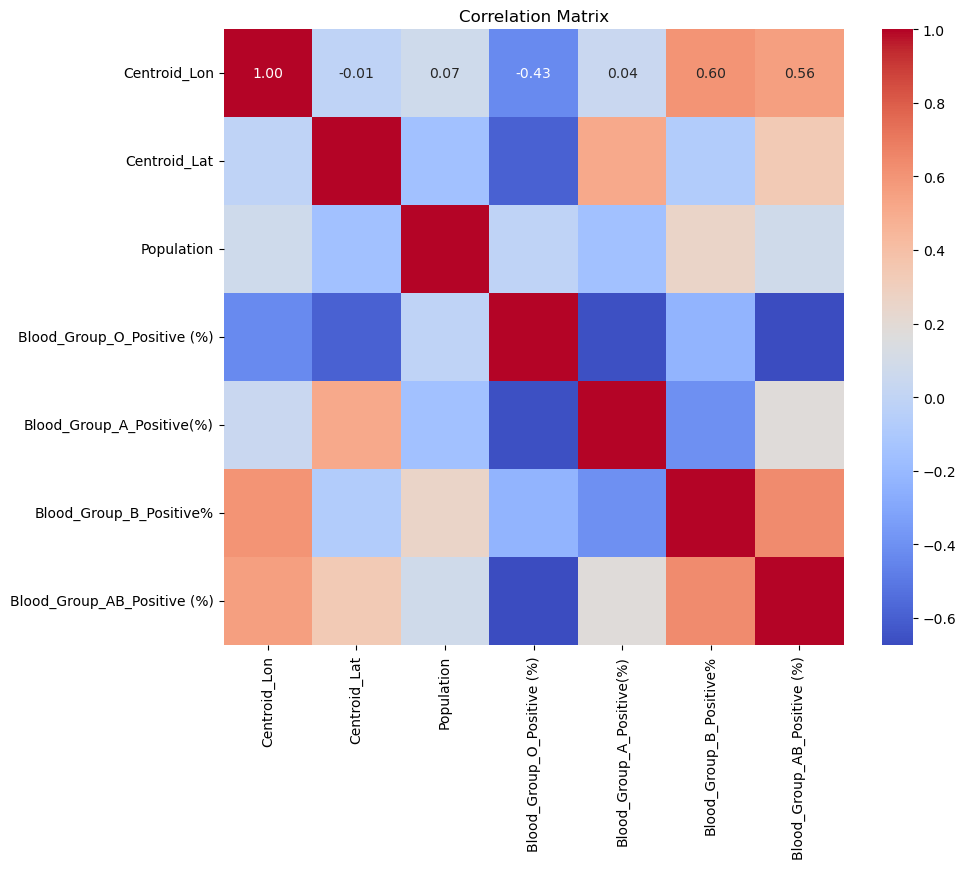

In [150]:
# Select only the numeric columns for correlation
numeric_columns = df[predictor_variables + ['Blood_Group_O_Positive (%)', 
                                           'Blood_Group_A_Positive(%)', 
                                           'Blood_Group_B_Positive%', 
                                           'Blood_Group_AB_Positive (%)']].select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_with_blood_groups = numeric_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_blood_groups, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()